In [1]:
#Librería base
import torch
#Componentes para Neural network NN
import torch.nn as nn
#Componentes para entrenar (optimizar) las NN
import torch.optim as optim
import torch.nn.functional as F
#Librería para graficar
import matplotlib.pyplot as plt
import numpy as np
#Fijamos la semilla para asegurar reproducibilidad 
torch.manual_seed(42)

In [2]:
# 
def plot_data(distances, times):
    '''
    función para graficar los datos 
    '''
    plt.figure(figsize=(8, 6))

    # Graficamos los puntos de datos
    plt.plot(distances.detach().numpy(), times.numpy(), color='orange', marker='o', linestyle='none', label='Data Points')
    # Etiquetas de los ejes
    plt.legend()
    # cuadrícula del fondo
    plt.grid(True)
    # imprimimos la gráfica
    plt.show()

In [3]:
def plot_results(model, distances, times):
    '''
    función para graficar los resultados del modelo entrenado
    '''
    x = torch.linspace(min(distances).item(), max(distances).item(), steps=100).unsqueeze(1)
    model.eval()
    # Hacemos predicciones sin calcular gradientes
    with torch.no_grad():
        predicted_times = model(x)
    
    # crea 
    plt.plot(distances.detach().numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Delivery Times')
    
    # Plot the predicted line from the model
    plt.plot(x.numpy(), predicted_times.numpy(), color='green', marker='None', label='Predicted Line')
    
    # Display the legend
    plt.legend()
    # Add a grid to the plot
    plt.grid(True)
    # Show the plot
    plt.show()

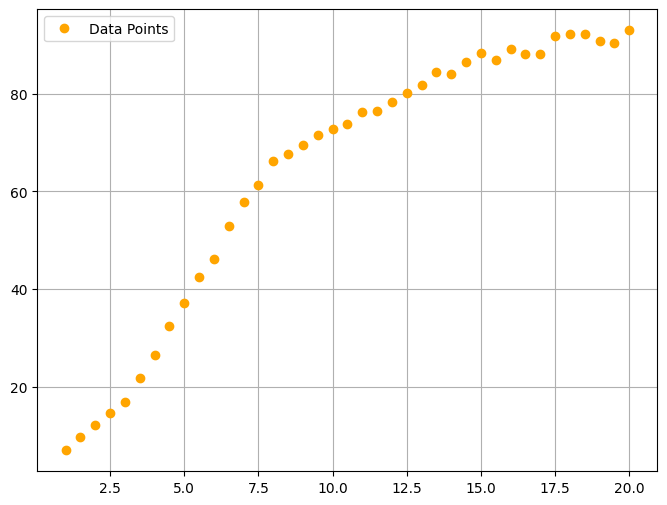

In [4]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

plot_data(distances, times)


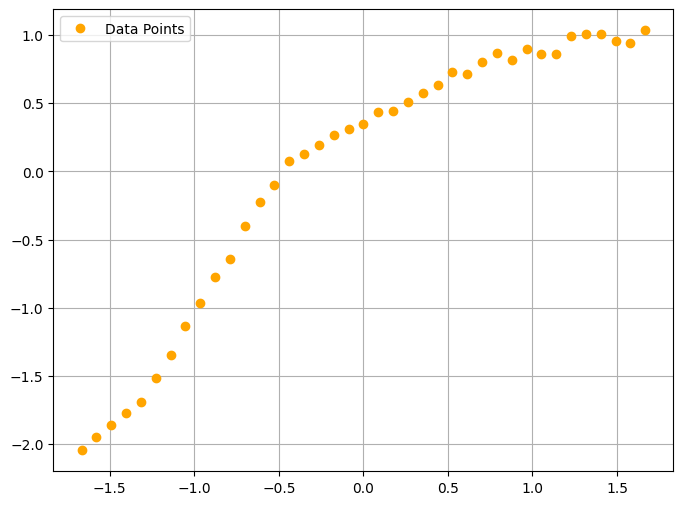

In [5]:
# Calculate the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

plot_data(distances_norm, times_norm)

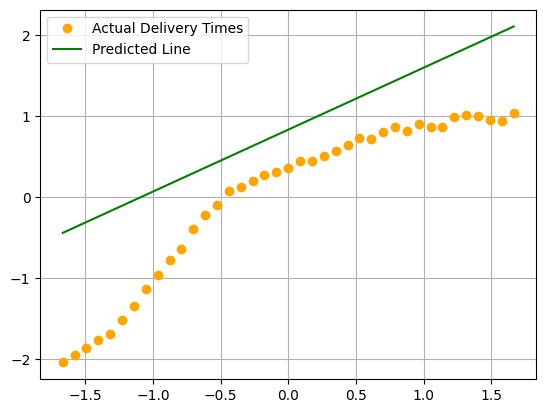

In [6]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1, 1))

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

plot_results(model, distances_norm, times_norm)

Epoch 50: Loss = 0.20904949307441711
Epoch 100: Loss = 0.12269130349159241
Epoch 150: Loss = 0.11121111363172531
Epoch 200: Loss = 0.10968479514122009
Epoch 250: Loss = 0.10948186367750168
Epoch 300: Loss = 0.10945486277341843
Epoch 350: Loss = 0.10945127159357071
Epoch 400: Loss = 0.1094507947564125
Epoch 450: Loss = 0.10945070534944534
Epoch 500: Loss = 0.10945073515176773


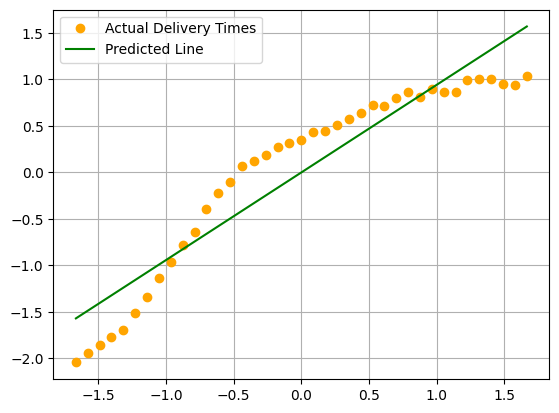

In [7]:
# Training loop
for epoch in range(500):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")


plot_results(model, distances_norm, times_norm)

In [8]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(27)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(), 
    nn.Linear(3, 1)
)
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


Training Complete.

Final Loss: 0.0031437124125659466


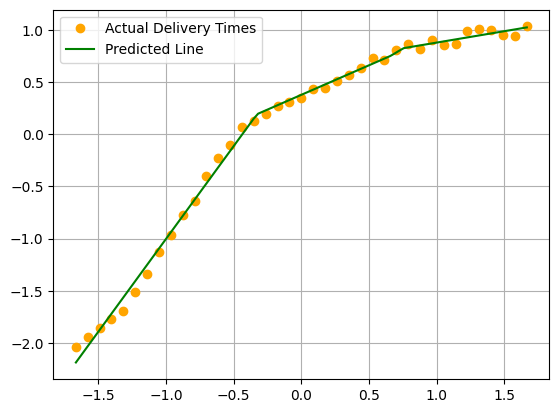

In [9]:
# Training loop
for epoch in range(3000):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")
plot_results(model, distances_norm, times_norm)

# función cuadratica

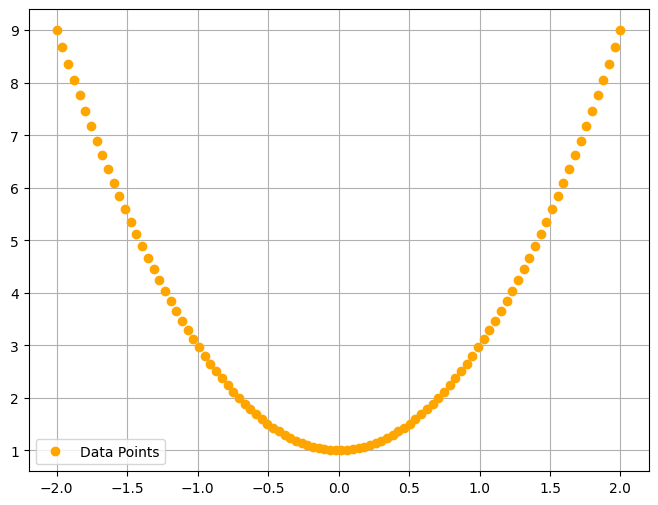

In [10]:
XD=np.linspace(-2,2,100)

XD = torch.tensor(XD, dtype=torch.float32).unsqueeze(1)
yd=2*XD**2+1

plot_data(XD,yd)

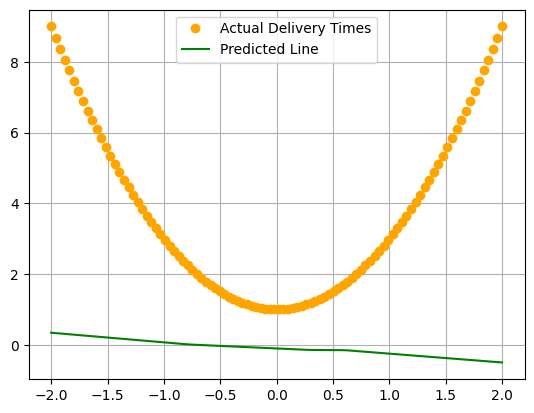

In [11]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1, 4),
                      nn.ReLU(),
                        nn.Linear(4, 1))

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

plot_results(model, XD, yd)

Epoch 10: Loss = 11.229686737060547
Epoch 20: Loss = 6.069337844848633
Epoch 30: Loss = 3.797208547592163
Epoch 40: Loss = 2.8604652881622314
Epoch 50: Loss = 2.360024929046631
Epoch 60: Loss = 2.0090219974517822
Epoch 70: Loss = 1.7321429252624512
Epoch 80: Loss = 1.504817008972168
Epoch 90: Loss = 1.3159353733062744
Epoch 100: Loss = 1.1580413579940796


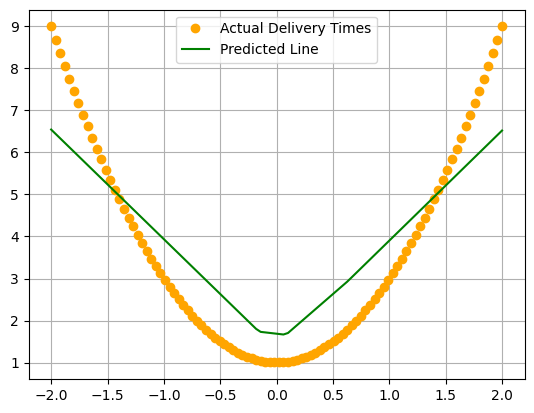

In [12]:
# Training loop
for epoch in range(100):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(XD)
    # Calculate the loss
    loss = loss_function(outputs, yd)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")


plot_results(model, XD, yd)

# XOR

In [13]:
def plot_results_clf(model, X, y):
    model.eval()
    # Hacemos predicciones sin calcular gradientes
    with torch.no_grad():
        pred_y = model(X)

    plt.scatter(X[:,0].numpy(), X[:,1].numpy(), c=pred_y.numpy(), cmap='bwr')

    # Display the legend
    plt.legend()
    # Add a grid to the plot
    plt.grid(True)
    # Show the plot
    plt.show()

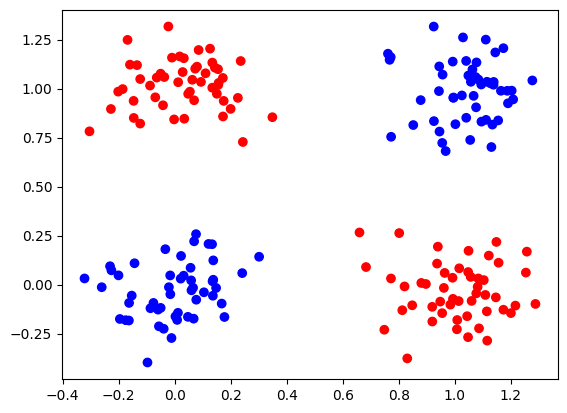

In [20]:
# Configuración de los datos
n_points = 200  # 50 puntos por cada uno de los 4 cuadrantes
noise = 0.15

# Generar centros: (0,0), (0,1), (1,0), (1,1)
centers = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([[0], [1], [1], [0]])

X_list = []
y_list = []

for i in range(4):
    # Crear una nube de puntos alrededor de cada centro
    points = centers[i] + np.random.normal(0, noise, (50, 2))
    X_list.append(points)
    # Asignar la etiqueta correspondiente a todos los puntos de esa nube
    y_list.append(np.full((50, 1), labels[i]))

# Convertir a Tensores de PyTorch
X = torch.tensor(np.vstack(X_list), dtype=torch.float32)
y = torch.tensor(np.vstack(y_list), dtype=torch.float32)

plt.scatter(X[:,0].numpy(), X[:,1].numpy(), c=y.numpy(), cmap='bwr')

/var/folders/0n/j4l3hc0j7t73hxnv2bhms74r0000gn/T/ipykernel_19144/695875981.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


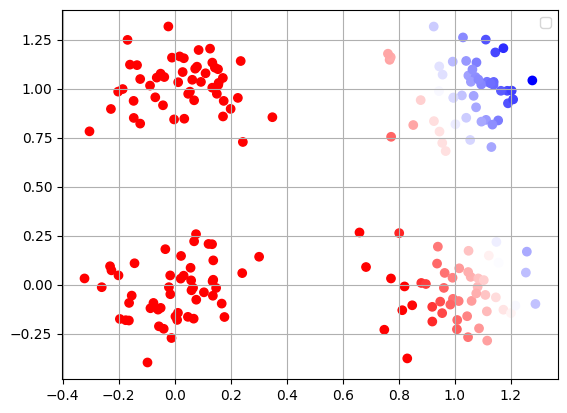

In [21]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(2, 2),
                      nn.ReLU(),
                      nn.Linear(2, 1),
                      nn.Sigmoid())

# Define the loss function and optimizer
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

plot_results_clf(model, X, y)


Epoch 10: Loss = 0.7175772786140442
Epoch 20: Loss = 0.7149138450622559
Epoch 30: Loss = 0.7123529314994812
Epoch 40: Loss = 0.7099025249481201
Epoch 50: Loss = 0.7075524926185608
Epoch 60: Loss = 0.7052896618843079
Epoch 70: Loss = 0.7031099200248718
Epoch 80: Loss = 0.7010223865509033
Epoch 90: Loss = 0.6990091800689697
Epoch 100: Loss = 0.6970664262771606


/var/folders/0n/j4l3hc0j7t73hxnv2bhms74r0000gn/T/ipykernel_19144/695875981.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


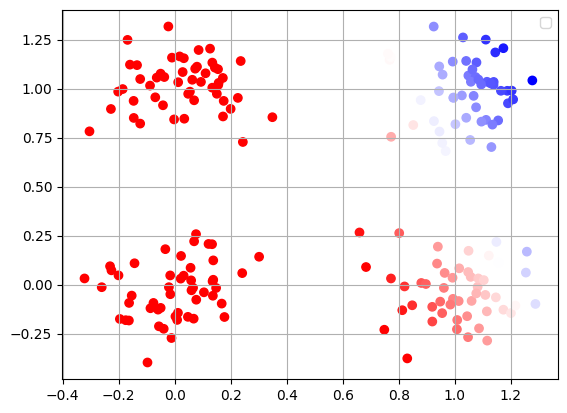

In [22]:
# Training loop
for epoch in range(100):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(X)
    # Calculate the loss
    loss = loss_function(outputs, y)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

plot_results_clf(model, X, outputs)


In [31]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(2, 8),
                      nn.ReLU(),
                      nn.Linear(8, 4),
                      nn.ReLU(),
                      nn.Linear(4, 1),
                      nn.Sigmoid())

# Define the loss function and optimizer
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)


Epoch 500: Loss = 0.6741929054260254
Epoch 1000: Loss = 0.5236077904701233
Epoch 1500: Loss = 0.1843445748090744
Epoch 2000: Loss = 0.09450050443410873


/var/folders/0n/j4l3hc0j7t73hxnv2bhms74r0000gn/T/ipykernel_19144/695875981.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


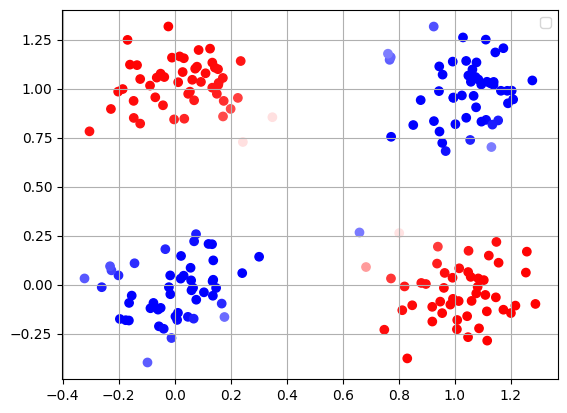

In [32]:
# Training loop
for epoch in range(2000):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(X)
    # Calculate the loss
    loss = loss_function(outputs, y)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

plot_results_clf(model, X, outputs)
